In [1]:
#####pip install opencv-python
import os
import cv2 as cv
import numpy as np
folder_path = r"C:\Users\ravasaheb\Desktop\avadhut_kar"

labels_list = os.listdir(folder_path)
print(labels_list)
Xt = []
y_label = []
for label in labels_list:
  particular_label_path = folder_path + "/" + label
  img_list = os.listdir(particular_label_path)
  #print(img_list)
  for i in img_list:
    img_path = particular_label_path + "/" + i
    #print(img_path)
    img = cv.imread(img_path,0)
    #plt.imshow(img)
    # img = downscale_local_mean(img, (3,3))
    img = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
    img = cv.resize(img, (32,32))
    # img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)[1]
    Xt.append(img)
    y_label.append(label)


Xt = np.asarray(Xt)
y_label = np.asarray(y_label)
# print(X)
# print(y_label)

Xt.shape

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'aa', 'aao', 'ah', 'ai', 'am', 'ao', 'au', 'b', 'bh', 'CH', 'chh', 'd', 'da', 'dh', 'dha', 'DNY', 'e', 'ee', 'G', 'GH', 'GY', 'H', 'i', 'j', 'jh', 'K', 'KH', 'KSH', 'l', 'lh', 'lru', 'm', 'n', 'na', 'o', 'oo', 'p', 'ph', 'r', 'ru', 'S', 'sh', 't', 'ta', 'th', 'tha', 'tr', 'u', 'v', 'y']


(9015, 32, 32)

In [2]:
X = np.asarray(Xt)/255
print(X.shape)
from sklearn.preprocessing import  LabelEncoder
label_en = LabelEncoder()
y_encoded = label_en.fit_transform(y_label)
y = np.asarray(y_encoded)
print(y.shape)


(9015, 32, 32)
(9015,)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((7212, 32, 32), (1803, 32, 32))

In [4]:
### Lenet
import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape
input_shape = (32, 32, 1)  # Assuming input images are 32x32 images

def build_lenet(input_shape):
    model = models.Sequential()

    # Layer 1: Convolutional Layer
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    # Pooling Layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Layer 2: Convolutional Layer
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    # Pooling Layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten the previous layer output
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(units=120, activation='relu'))

    # Fully Connected Layer 2
    model.add(layers.Dense(units=84, activation='relu'))

    # Output layer
    model.add(layers.Dense(units=61, activation = 'softmax'))

    return model



# Build LeNet-5 model
lenet_model = build_lenet(input_shape)

# Print model summary
lenet_model.summary()

lenet_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])

C:\Users\ravasaheb\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 61)                  │           5,185 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,041 (257.97 KB)

 Trainable params: 66,041 (257.97 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
lenet_model.fit(X_train, y_train, batch_size = 52, epochs=15, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = lenet_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0501 - loss: 3.9590 - val_accuracy: 0.2668 - val_loss: 2.7513
Epoch 2/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3504 - loss: 2.3751 - val_accuracy: 0.4997 - val_loss: 1.7961
Epoch 3/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5635 - loss: 1.5573 - val_accuracy: 0.5990 - val_loss: 1.4219
Epoch 4/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6650 - loss: 1.1631 - val_accuracy: 0.6545 - val_loss: 1.1826
Epoch 5/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7202 - loss: 0.9330 - val_accuracy: 0.6722 - val_loss: 1.0584
Epoch 6/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7652 - loss: 0.7956 - val_accuracy: 0.7266 - val_loss: 0.9186
Epoch 7/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8157 - loss: 0.6197 - val_accuracy: 0.7238 - val_loss: 0.9401
Epoch 8/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8331 - loss: 0.5641 - val_accuracy: 0.

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


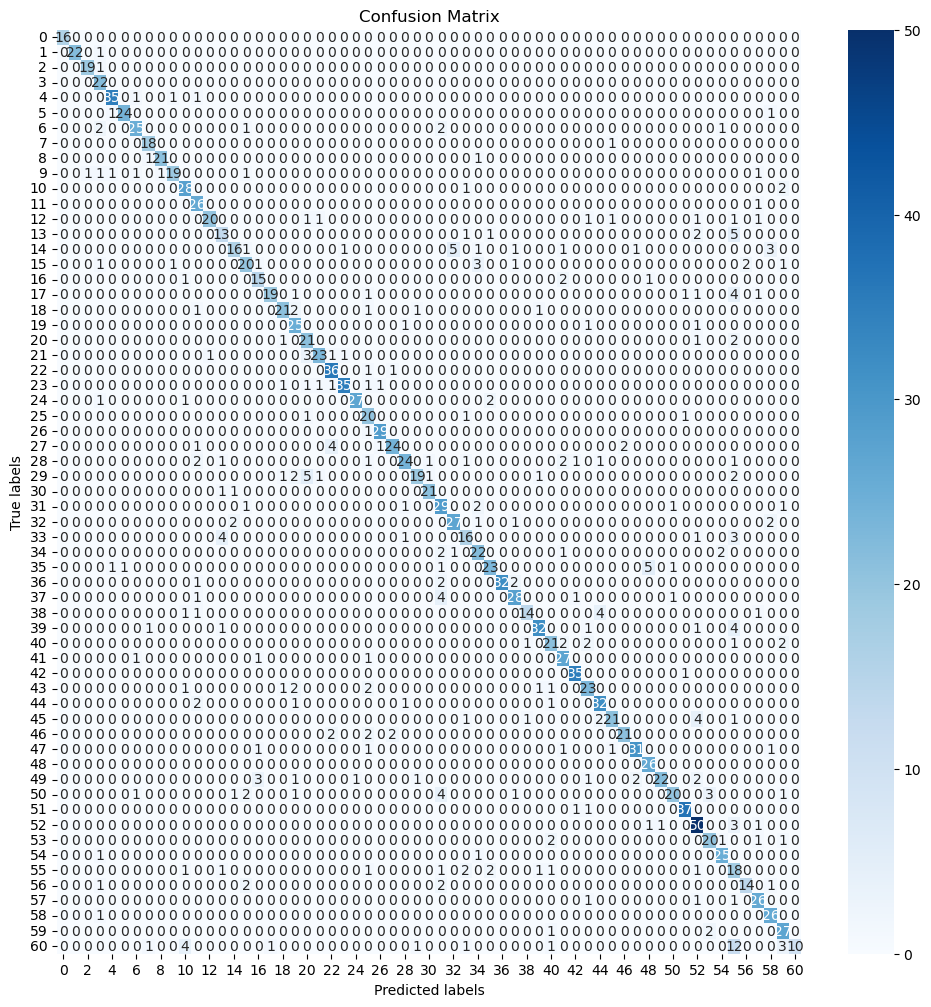

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for each class on the test set
y_pred_prob = lenet_model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [8]:
y_original1 = label_en.inverse_transform([60,55])
print(y_original1)     ## for letters y and th their is presence of maximum misclassification given by classifier.

['y' 'th']


In [9]:
y_original2 = label_en.inverse_transform([14,32])
print(y_original2)     ## for letters GY and da their is pressence of 2nd maximumnmisclassification given by classifier.

['GY' 'da']


In [10]:
y_original3 = label_en.inverse_transform([29,20])
print(y_original3) 

['bh' 'a']


In [11]:
#### alexnet

import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape
input_shape_32x32 = (32, 32, 1)  # Assuming input images are 32x32 RGB images
num_classes = 61  # Example number of classes

def build_alexnet_for_32x32(input_shape, num_classes):
    model = models.Sequential()

    # Layer 1: Convolutional Layer
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # Pooling Layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Layer 2: Convolutional Layer
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    # Pooling Layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Layer 3: Convolutional Layer
    model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

    # Flatten the previous layer output
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(units=512, activation='relu'))

    # Fully Connected Layer 2
    model.add(layers.Dense(units=256, activation='relu'))

    # Output layer
    model.add(layers.Dense(units=num_classes, activation='softmax'))

    return model



# Build AlexNet model for 32x32 input
alexnet_model_32x32 = build_alexnet_for_32x32(input_shape_32x32, num_classes)

# Print model summary
alexnet_model_32x32.summary()


alexnet_model_32x32.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])

C:\Users\ravasaheb\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 61)                  │          15,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,288,765 (4.92 MB)

 Trainable params: 1,288,765 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
alexnet_model_32x32.fit(X_train, y_train, batch_size = 52, epochs=25, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = alexnet_model_32x32.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.1170 - loss: 3.5959 - val_accuracy: 0.5413 - val_loss: 1.5306
Epoch 2/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.6506 - loss: 1.1492 - val_accuracy: 0.7587 - val_loss: 0.8140
Epoch 3/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.8201 - loss: 0.5746 - val_accuracy: 0.8103 - val_loss: 0.5989
Epoch 4/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8964 - loss: 0.3252 - val_accuracy: 0.8342 - val_loss: 0.5309
Epoch 5/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9440 - loss: 0.1759 - val_accuracy: 0.8519 - val_loss: 0.4982
Epoch 6/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9523 - loss: 0.1459 - val_accuracy: 0.8530 - val_loss: 0.5423
Epoch 7/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9665 - loss: 0.1035 - val_accuracy: 0.8658 - val_loss: 0.5058
Epoch 8/25
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9743 - loss: 0.0812 - val_accu

In [11]:
#y_original = label_en.inverse_transform(y_encoded) #alexnet_model_32x32

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for each class on the test set
y_pred_prob = alexnet_model_32x32.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

y_original = label_en.inverse_transform(y_pred)
y_testo = label_en.inverse_transform(y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


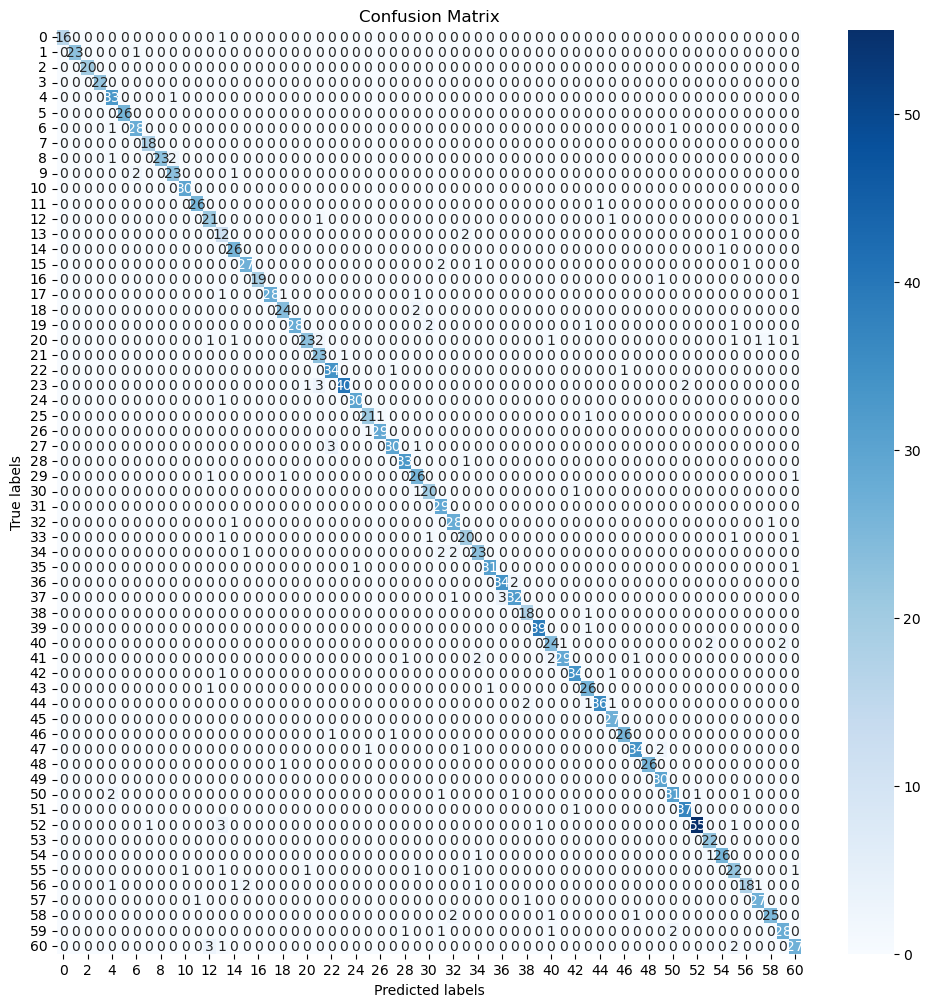

In [14]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_original, y_testo)

# Plot confusion matrix
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
##maximum misclassification is 3 times some of these letters are as below
y_original1 = label_en.inverse_transform([23,21])
print(y_original1) 

['ah' 'aa']


In [16]:
y_original2 = label_en.inverse_transform([60,12])
print(y_original2) 

['y' 'G']


In [17]:
y_original2 = label_en.inverse_transform([13,52])
print(y_original2)   

['GH' 'sh']


In [12]:
set(y_testo)

{'0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'CH',
 'DNY',
 'G',
 'GH',
 'GY',
 'H',
 'K',
 'KH',
 'KSH',
 'S',
 'a',
 'aa',
 'aao',
 'ah',
 'ai',
 'am',
 'ao',
 'au',
 'b',
 'bh',
 'chh',
 'd',
 'da',
 'dh',
 'dha',
 'e',
 'ee',
 'i',
 'j',
 'jh',
 'l',
 'lh',
 'lru',
 'm',
 'n',
 'na',
 'o',
 'oo',
 'p',
 'ph',
 'r',
 'ru',
 'sh',
 't',
 'ta',
 'th',
 'tha',
 'tr',
 'u',
 'v',
 'y'}

In [13]:
import numpy as np

# Assuming 'arr' is your array
unique_values = np.unique(y_testo)
# Assuming 'arr' is your array
unique_values = set(y_testo)
unique_values_list = list(unique_values)

In [14]:
print(unique_values_list)

['th', 'ee', 'ah', 'dha', '1', 't', 'lh', '5', 'au', 'sh', 'na', 'S', '8', 'a', 'am', 'u', 'da', 'ru', 'GY', 'n', 'p', 'G', 'l', 'dh', 'H', 'bh', '7', 'ao', 'tha', '9', 'y', '6', '4', 'oo', 'o', 'd', 'e', 'GH', 'i', 'ai', 'chh', 'CH', 'DNY', '2', 'b', 'ph', 'jh', '3', 'lru', 'aa', 'K', 'KH', 'tr', 'j', 'aao', 'v', 'ta', '0', 'r', 'm', 'KSH']


In [15]:
len(unique_values_list)

61

In [16]:
print(y_original, y_testo)

['ah' 'y' 't' ... 'KH' 'p' 'H'] ['ah' 'y' 't' ... 'KH' 'p' 'H']


In [17]:
from sklearn.metrics import confusion_matrix

# Assuming you have y_label and y_original
conf_matrix = confusion_matrix(y_original, y_testo)


In [18]:
conf_matrix

array([[13,  0,  0, ...,  0,  0,  0],
       [ 0, 33,  0, ...,  0,  0,  0],
       [ 0,  1, 22, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 28,  0,  0],
       [ 0,  0,  0, ...,  0, 25,  0],
       [ 0,  0,  0, ...,  0,  0, 17]], dtype=int64)

In [19]:
import numpy as np

# Assuming you have y_label and y_original as arrays of strings
# Compute unique classes
classes = np.unique(np.concatenate((y_label, y_original)))

# Initialize confusion matrix
conf_matrix = np.zeros((len(classes), len(classes)), dtype=np.int32)

# Populate confusion matrix
for actual, pred in zip(y_label, y_original):
    row = np.where(classes == actual)[0][0]
    col = np.where(classes == pred)[0][0]
    conf_matrix[row, col] += 1

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[0 1 2 ... 1 1 1]
 [2 3 2 ... 0 1 1]
 [2 2 0 ... 3 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
# Assuming you have already encoded y_label and stored it in y_encoded
# And you have the label_en instance created as label_en = LabelEncoder()

# Transform encoded numerical values back into original categorical labels
y_original = label_en.inverse_transform(y_pred)
y_original1 = label_en.inverse_transform(y_test)

In [21]:
len(y_test)

1803

In [22]:
import pandas as pd


In [23]:
pd.DataFrame(y_original,y_original1)

,0
ah,ah
y,y
t,t
ao,ao
r,r
...,...
n,n
CH,CH
KH,KH
p,p
